# Notebook 2c - Exploratory Data Analysis: Combined Data (Bee Colony and Air Quality)

This notebook explores the merged dataset which integrates information from bee population surveys conducted between 1987 and 2017 with air quality data spanning from 1980 to 2023. For the purpose of this analysis, the overlapping years of 1987 to 2017 will be examined in detail.

---

# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('./data/modelling_dataframe.csv')

In [25]:
data

,Unnamed: 0,Year,State,Bee Colonies,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,0,1987,alabama,46000,cullman,125,73,31,16,5,0,0,177,115,47,0,0,125,0,0
1,1,1987,alabama,46000,etowah,59,40,19,0,0,0,0,70,57,39,0,0,0,0,59
2,2,1987,alabama,46000,jefferson,365,167,158,36,4,0,0,182,105,52,94,0,158,0,113
3,3,1987,alabama,46000,madison,237,149,60,22,6,0,0,172,108,45,0,0,237,0,0
4,4,1987,alabama,46000,mobile,287,199,70,16,2,0,0,154,84,43,0,0,247,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,28507,2017,wyoming,60500,sublette,365,228,129,8,0,0,0,150,71,48,0,0,345,20,0
28508,28508,2017,wyoming,60500,sweetwater,365,260,100,2,2,1,0,264,65,46,0,1,321,7,36
28509,28509,2017,wyoming,60500,teton,365,299,65,1,0,0,0,118,59,44,0,0,341,24,0
28510,28510,2017,wyoming,60500,uinta,365,310,53,1,0,0,1,696,54,44,0,3,348,0,14


# Exploration of merged dataframe 

In [46]:
# Defining pollutants
pollutants = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']

## What is the macro-trend (trend accross the whole of the US) of days of pollutants?

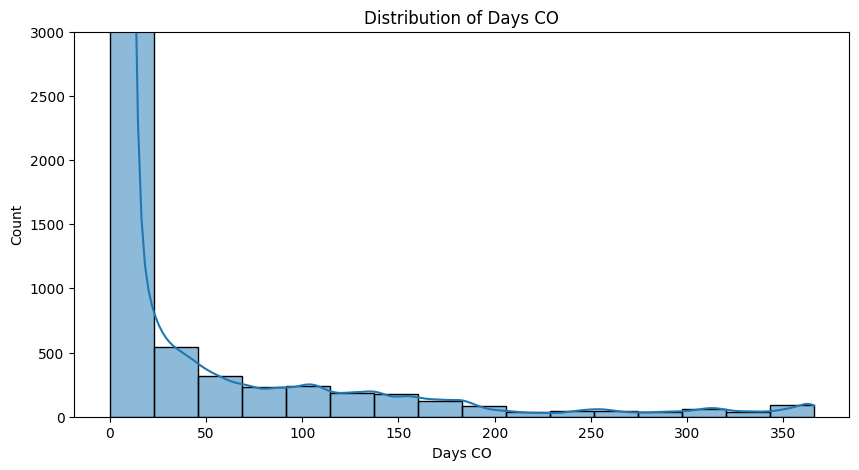

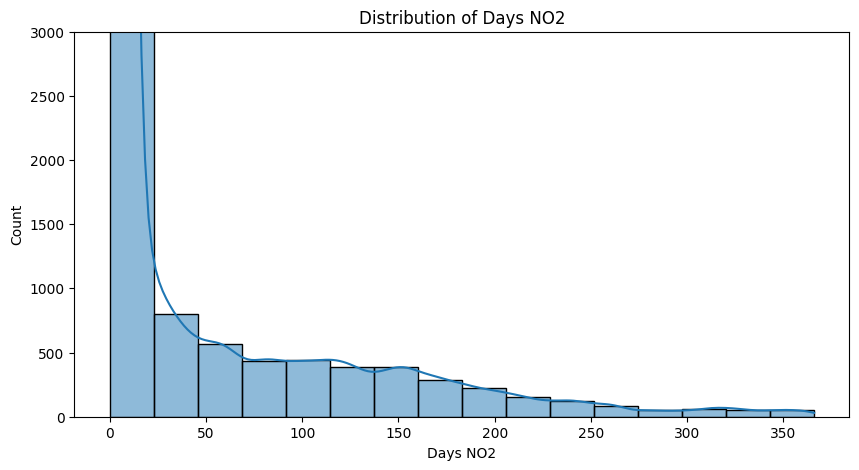

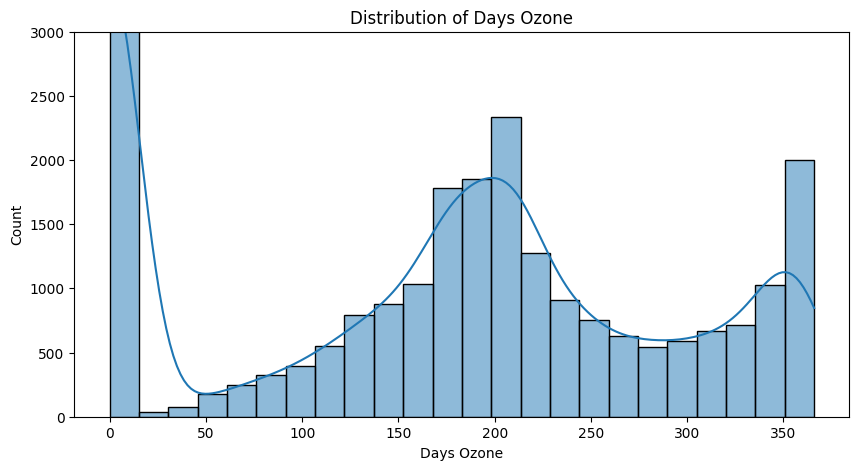

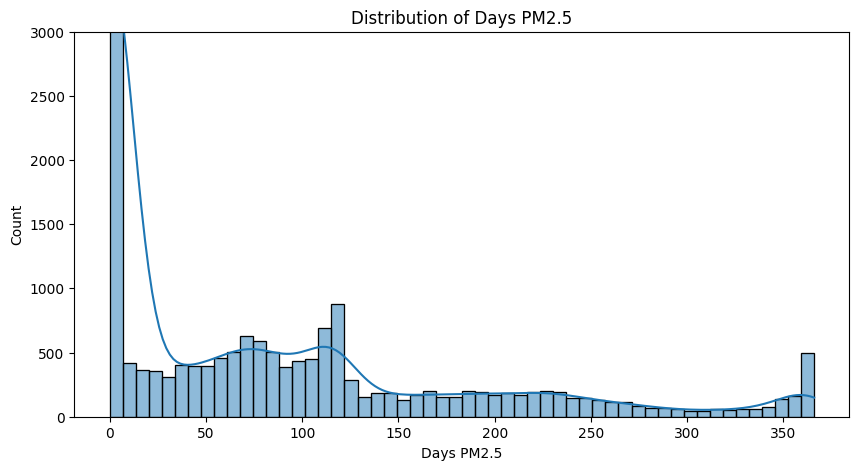

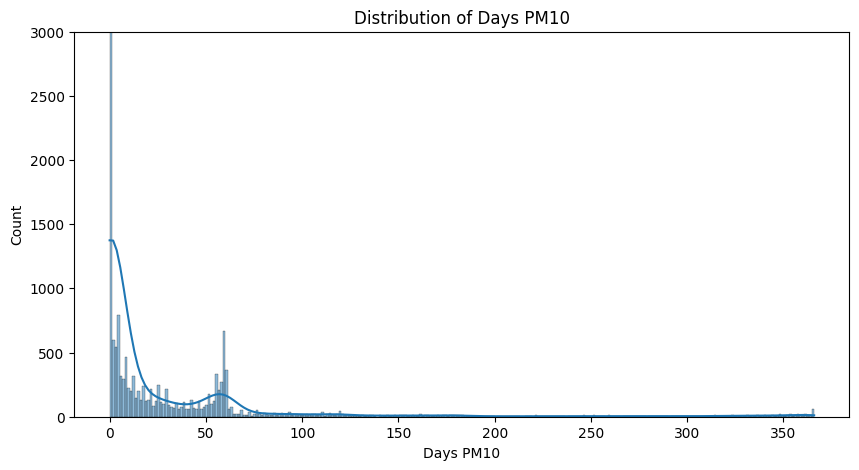

In [9]:
# Plotting distributions of pollutants

for pollutant in pollutants:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[pollutant], kde=True)
    plt.title(f'Distribution of {pollutant}')
    plt.ylim(0,3000)
    plt.show()

## Visualizing the relationship between Number of Bee Colonies and Mean Days of Pollutants by State 

Average measurements, from 1987 to 2017, per state for:
* Days of $CO$ (Carbon Monoxide)
* Days of $NO$<sub>2</sub> (Nitrous Dioxide)
* Days of $O$<sub>3</sub> (Ozone)
* Days of PM2.5
* Days of PM10

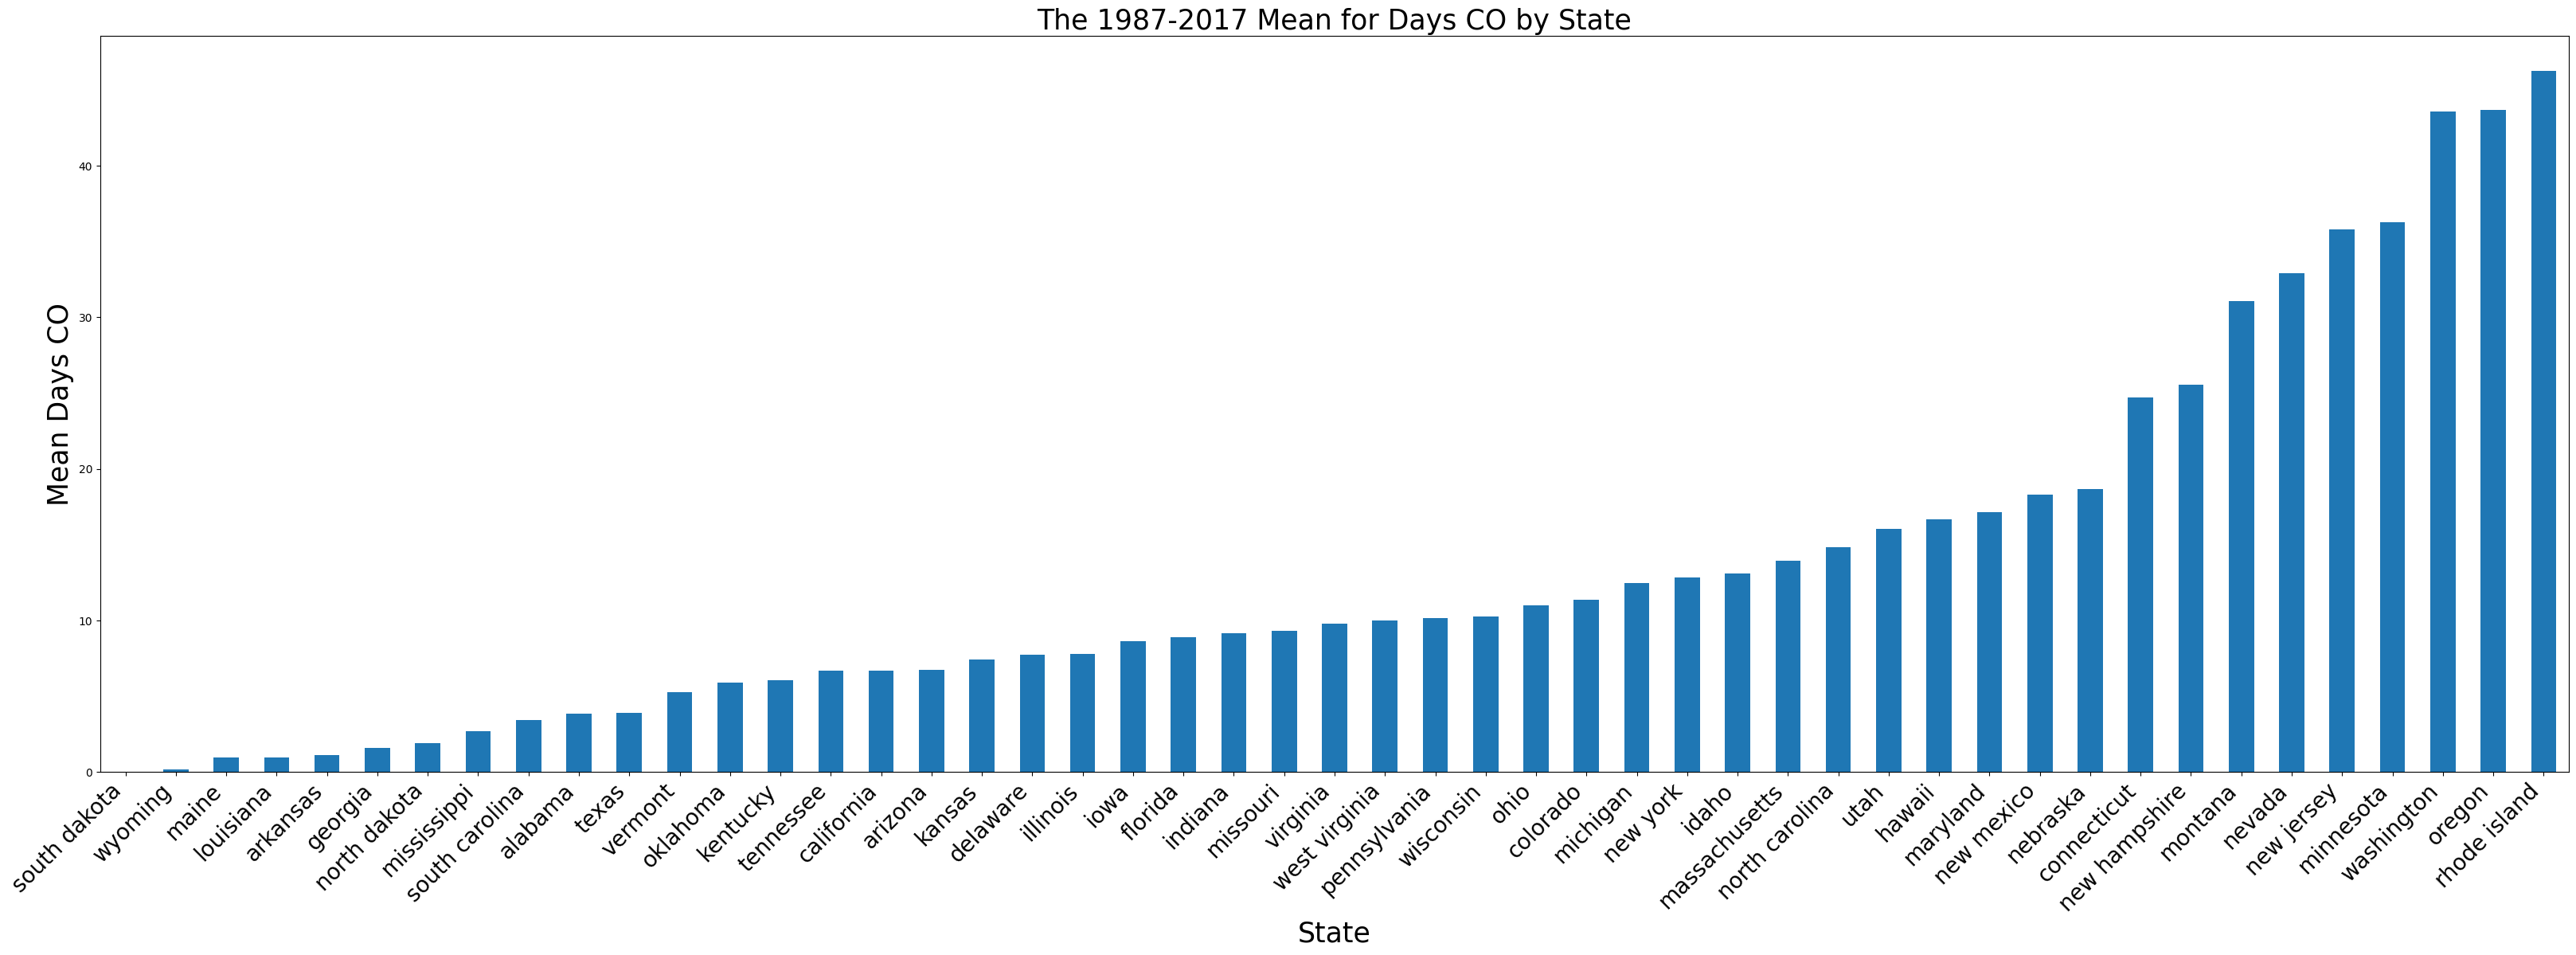

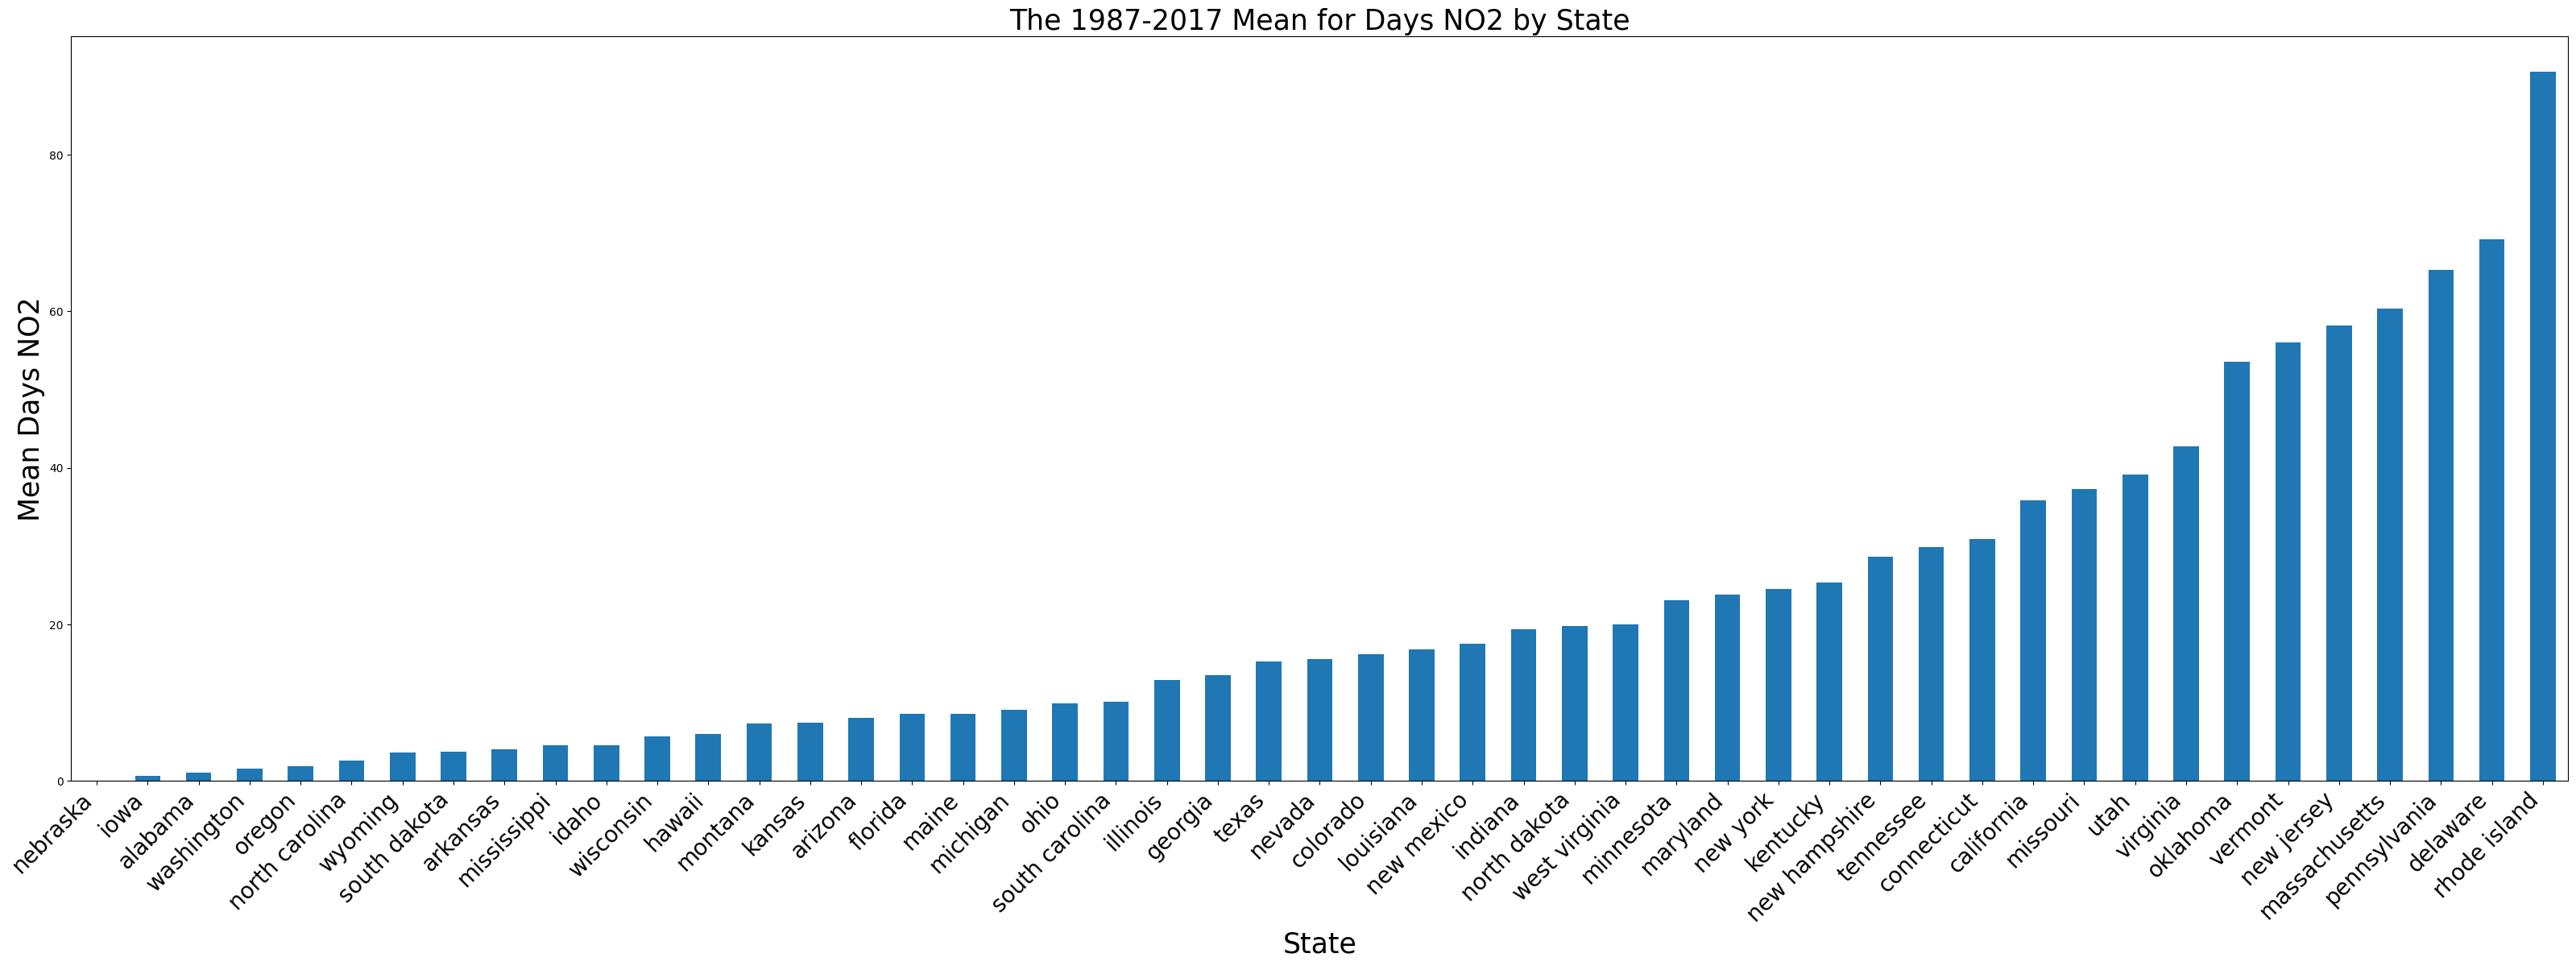

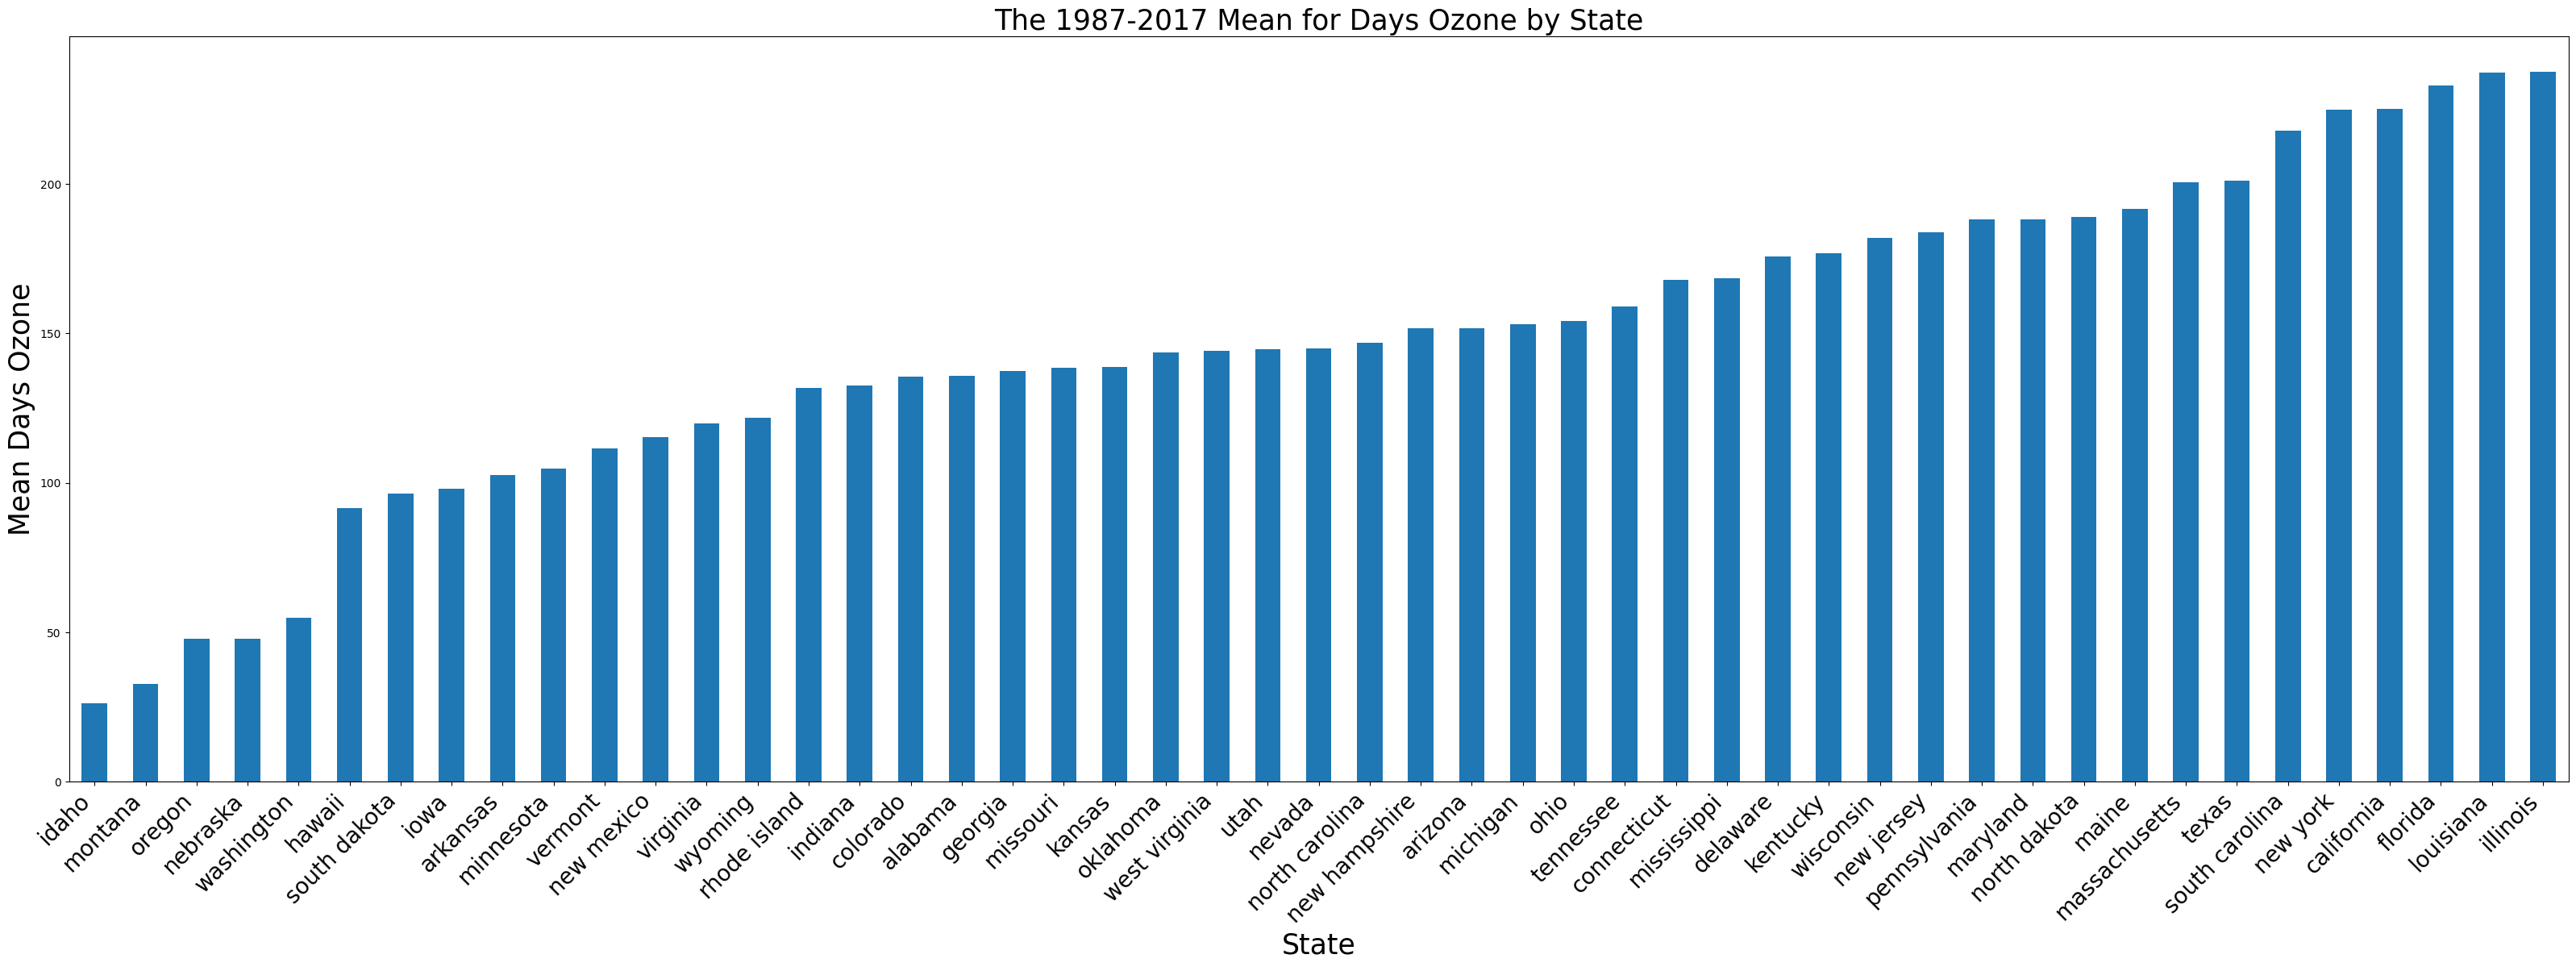

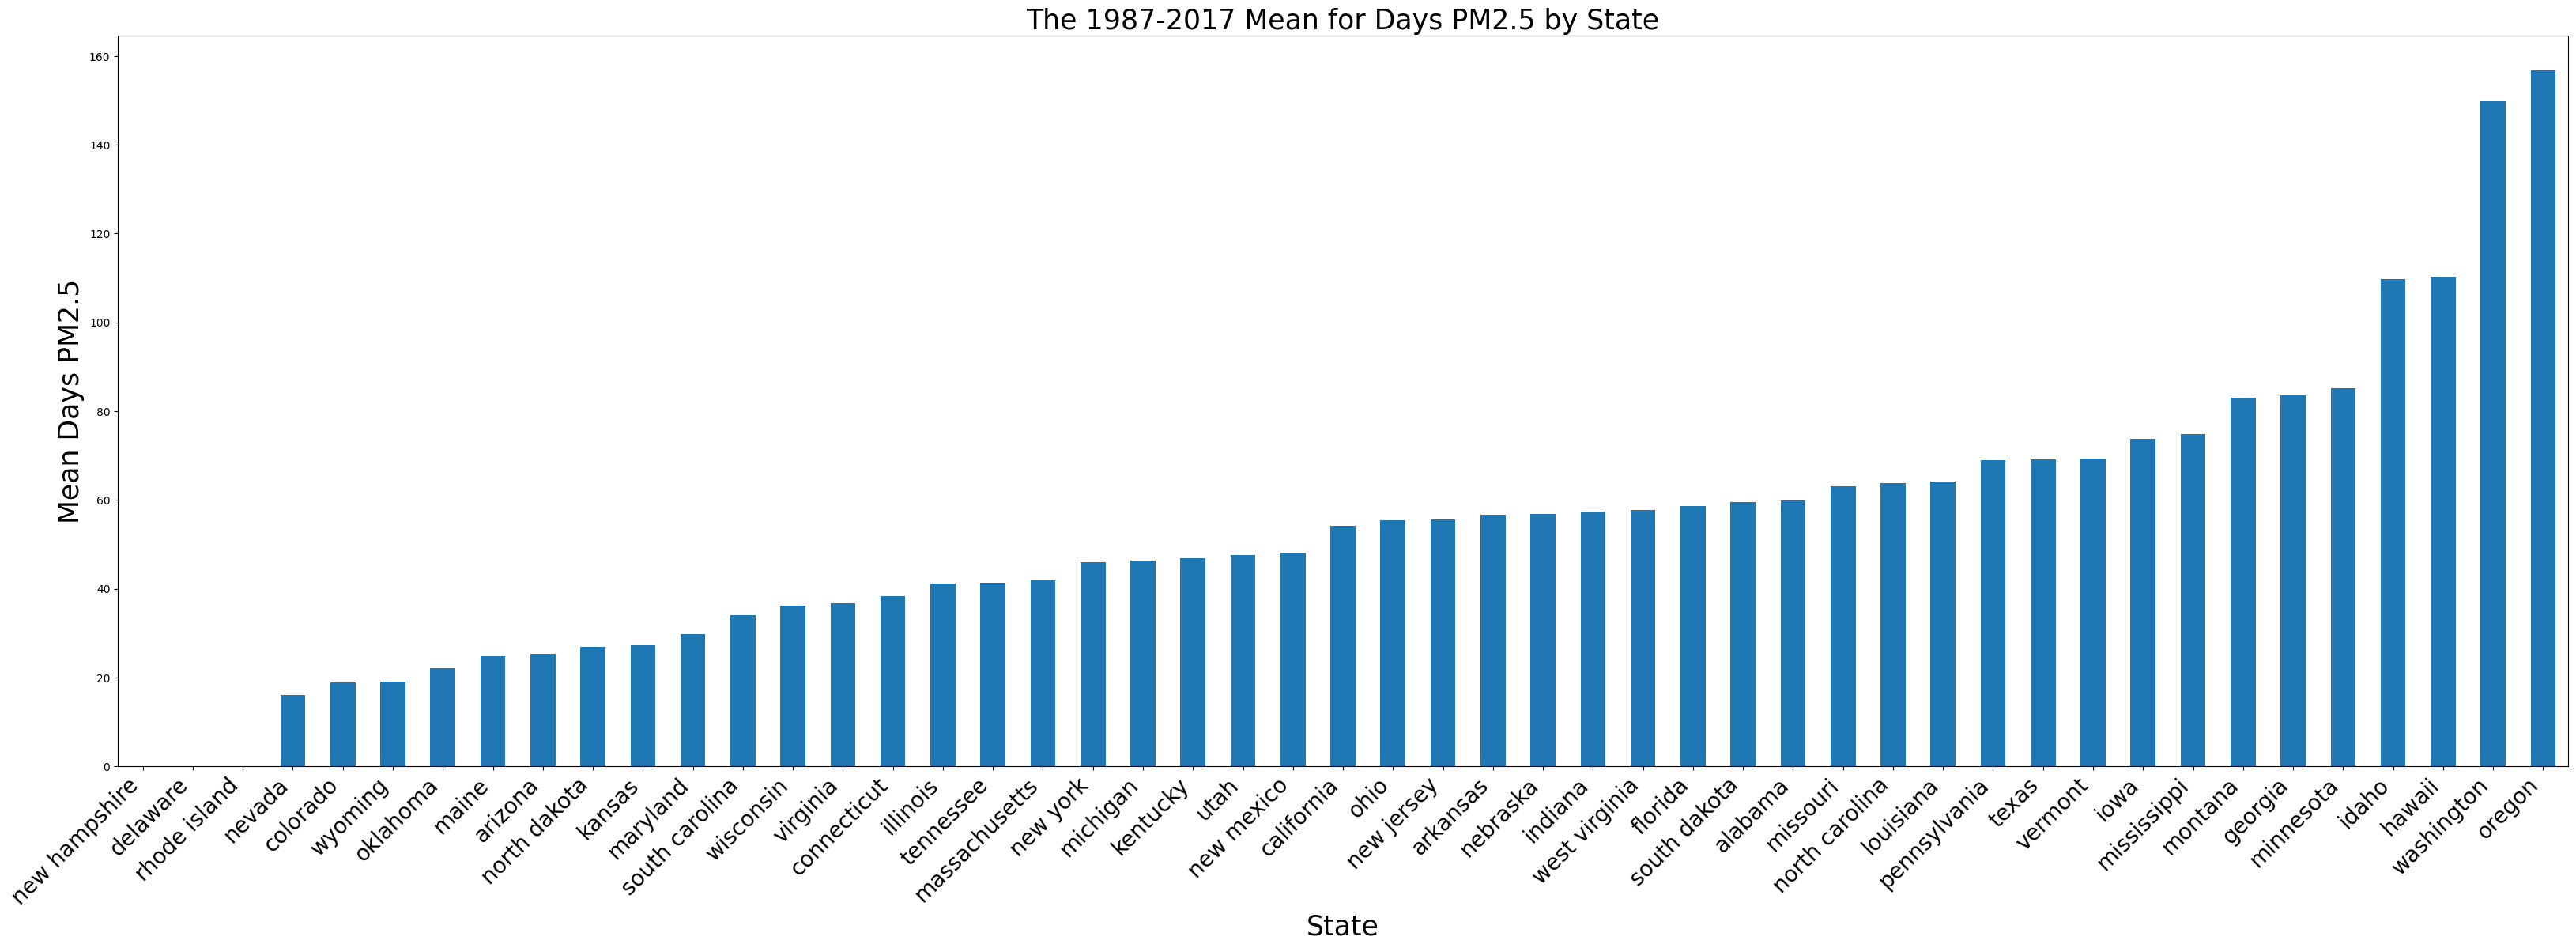

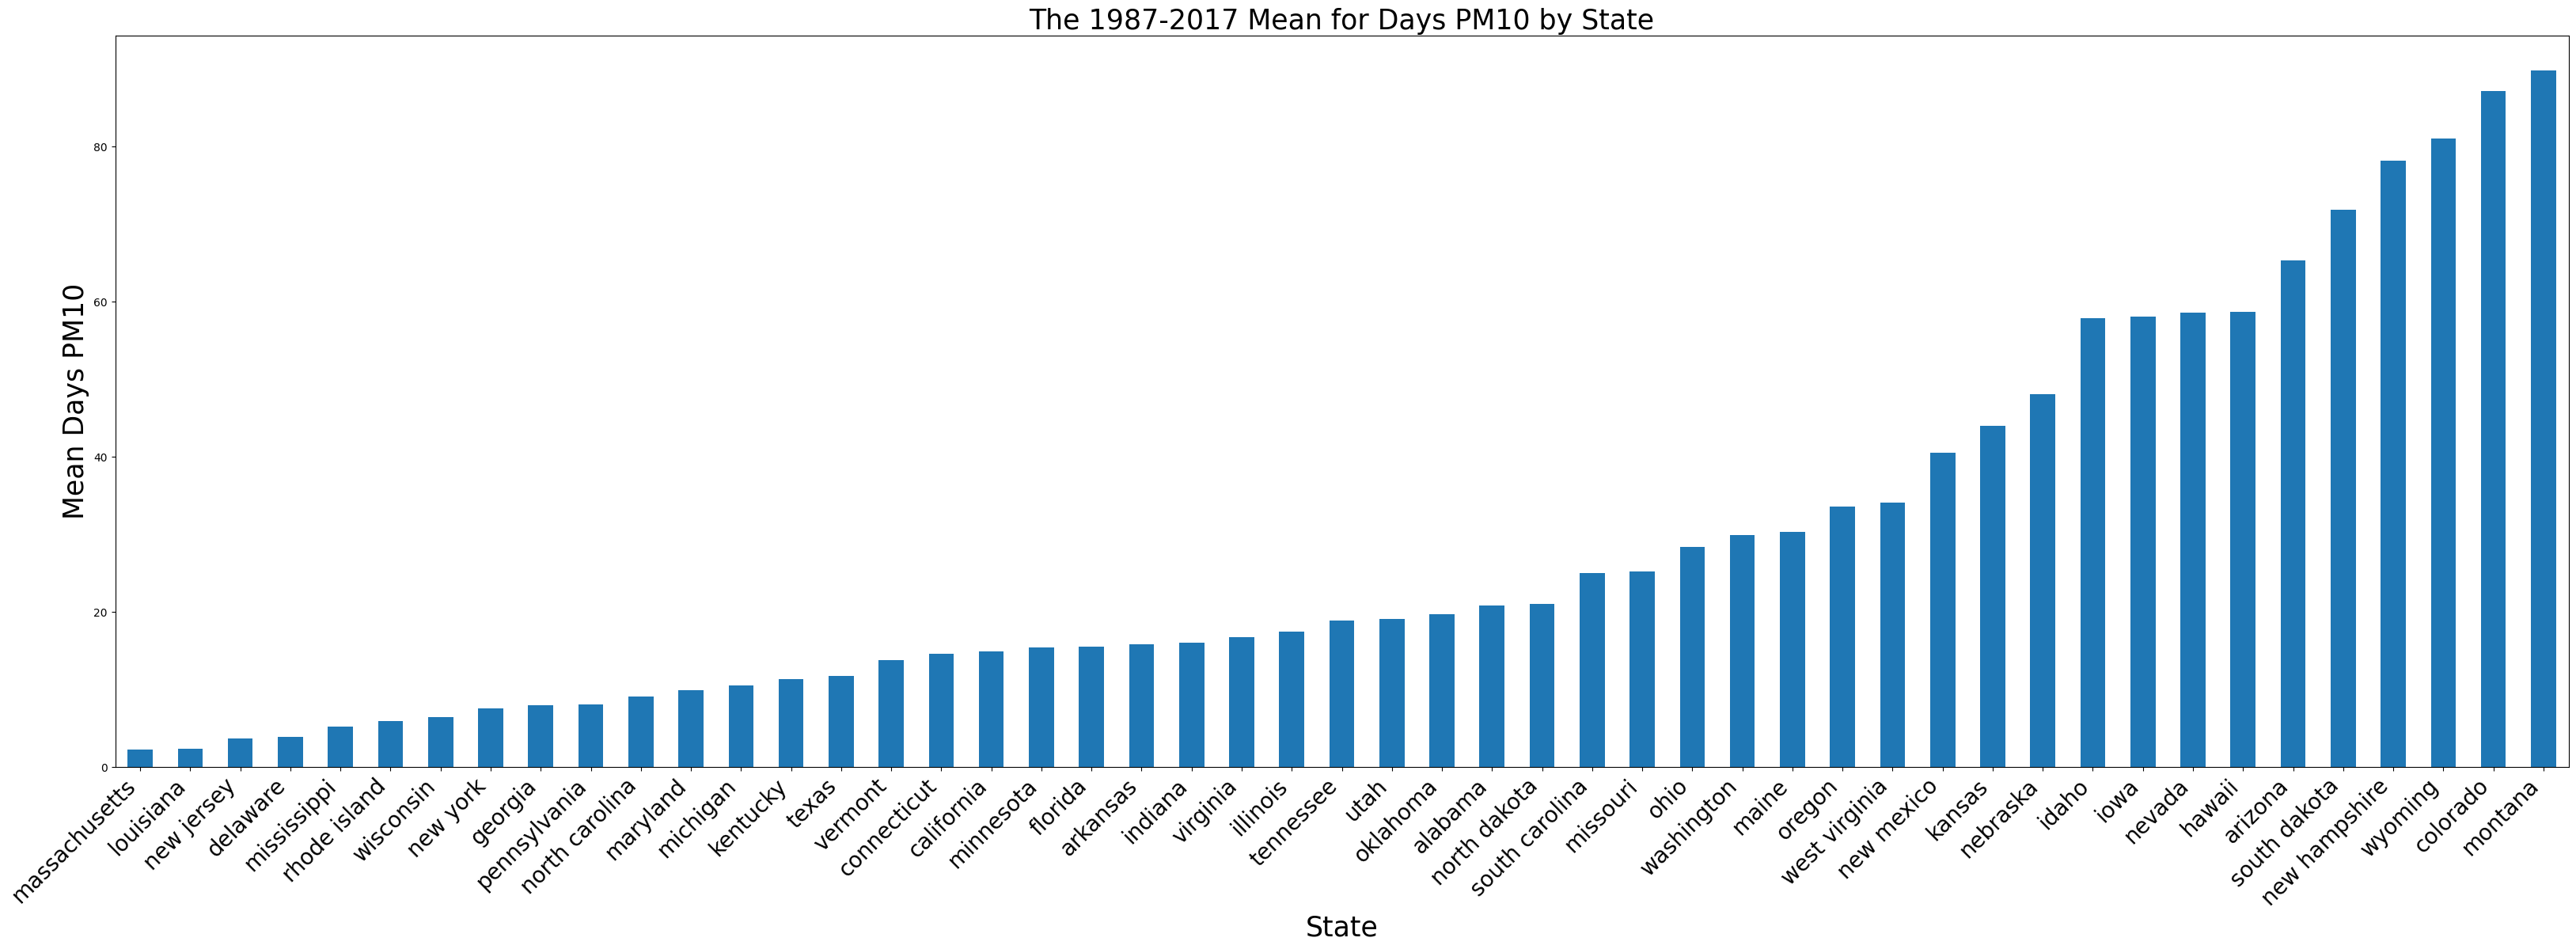

In [24]:

for pollutant in pollutants:

    data_mean_state = data.groupby(['State', 'Year']).mean(numeric_only = True).reset_index()

    plt.figure(figsize = (40, 12))
    data_mean_state.groupby('State')[pollutant].mean().sort_values().plot(kind = 'bar');

    plt.title(f'The 1987-2017 Mean for {pollutant} by State', size = 25);
    plt.xlabel('State', size = 25);
    plt.ylabel(f'Mean {pollutant}', size = 25);
    plt.xticks(rotation=45, ha = 'right', size = 20);

## Visualizing Number of Bee Colonies vs Number of Days Pollutants (accross the states over time period 1987 - 2017)

Our aim here is to understand the larger trend of where we see more / less bee colonies, depending on level of pollutants, over the total time period for our recorded data. Since this plot is for all states and all years, we cannot make any inference about a specific point, but rather, our aim is to see the shape of the distribution to get a general sense of where more / less bee colonies are present depending on pollutant levels.
We set our x scale to 365 since the maximum days in a year where any one gas could have been the worse gas, the data would be captured to scale on the plot.

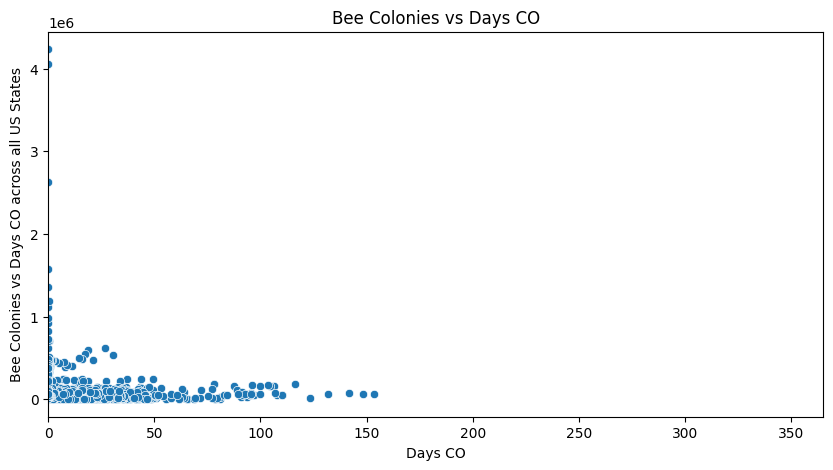

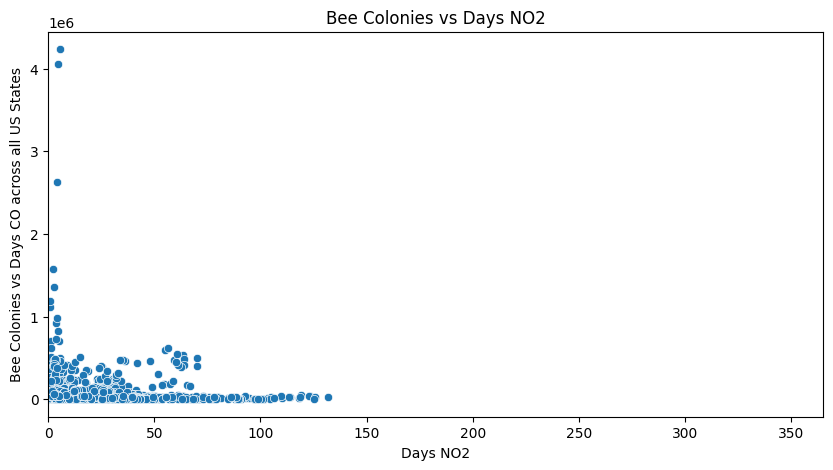

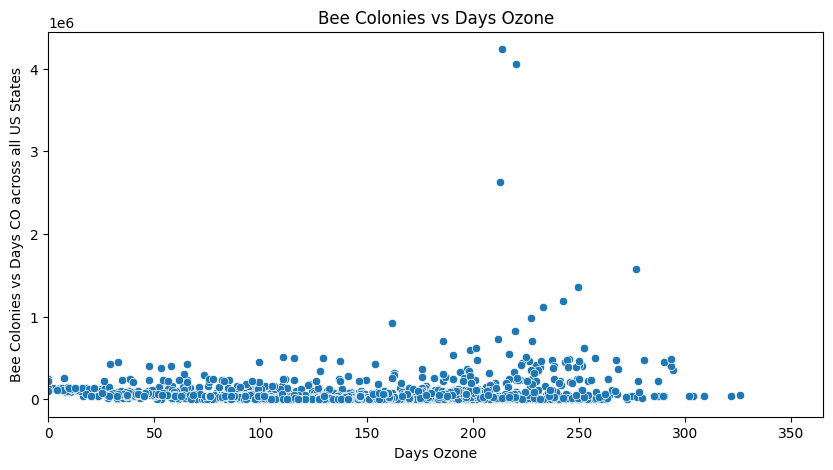

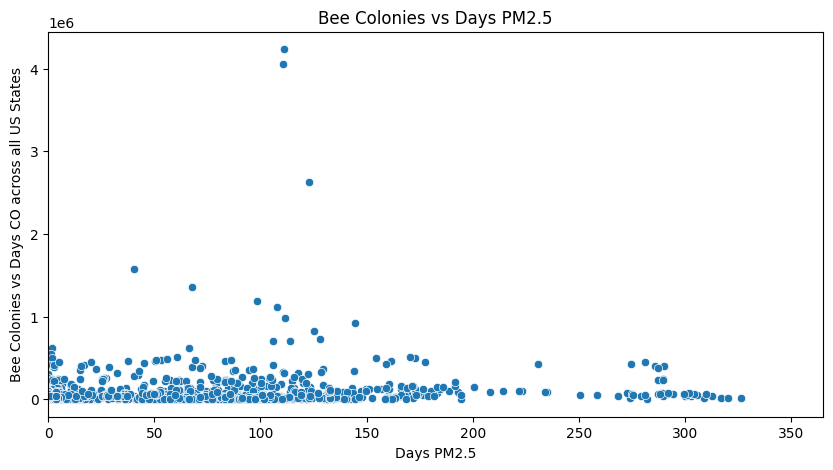

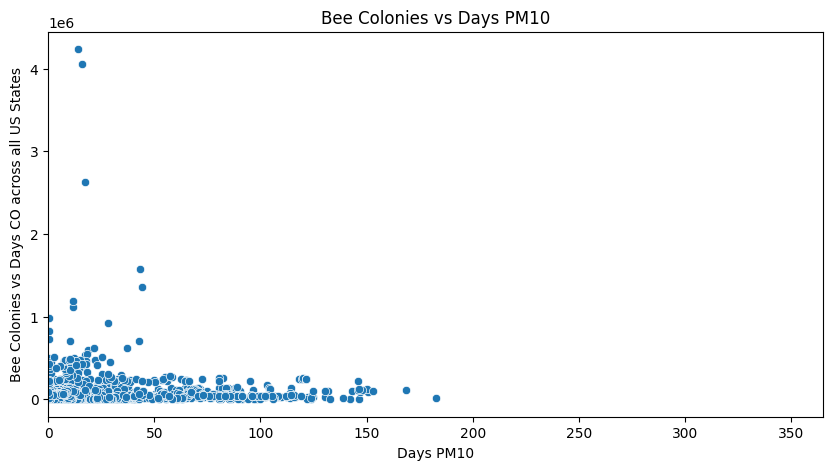

In [31]:
for pollutant in pollutants:
    plt.figure(figsize=(10, 5))
    sns.scatterplot( x = data_mean_state[pollutant], y=data_mean_state['Bee Colonies'])
    plt.title(f'Bee Colonies vs {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Bee Colonies vs Days CO across all US States')
    plt.xlim(0,365)

From the above plots, we can see that there tend to be a higher number of bee colonies where there are a lower number of days of pollutants. 

## Which 5 states have the highest and lowest number of cumulative days of pollutants?

Top 5 states with highest Days CO days:
            Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                           
washington    24130      1203       40199      134515      18462
new jersey    18447     30058       94343       28509       1879
montana       18342      4323       19316       48793      54233
oregon        17911       905       26728      105893      13593
minnesota     16016     11205       58361       53201       7779
Bottom 5 states with lowest Days CO days:
              Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                             
rhode island      370       725        1055           0         47
maine             327      3340       73156        8913      11908
delaware           93       830        2108           0         47
wyoming            86      1729       58678        9172      34195
south dakota        2       961       24030       14818      

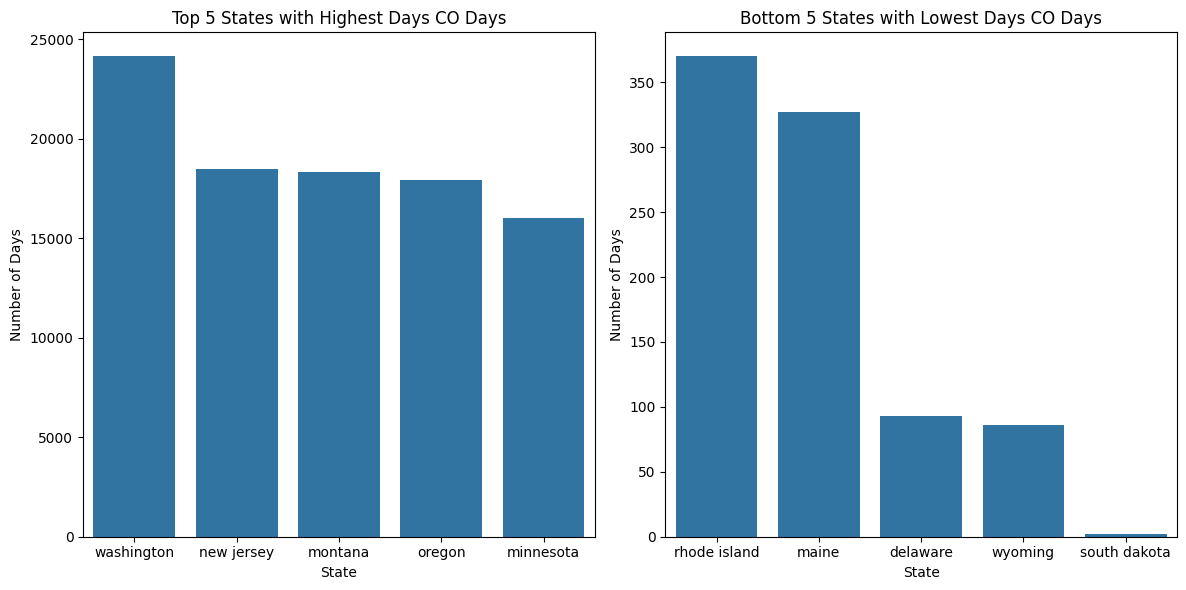

Top 5 states with highest Days NO2 days:
              Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                             
pennsylvania     9530     61645      192824       77949       7929
california      10730     58868      371983       90191      24651
virginia        11421     50335      140496       42699      20710
new jersey      18447     30058       94343       28509       1879
new york        12184     24605      224530       46229       7745
Bottom 5 states with lowest Days NO2 days:
               Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                              
rhode island       370       725        1055           0         47
hawaii            1985       706       10674       12684       6394
new hampshire      458       533        3111           0       1504
iowa              2806       369       46656       44265      25612
nebraska          4944         0       

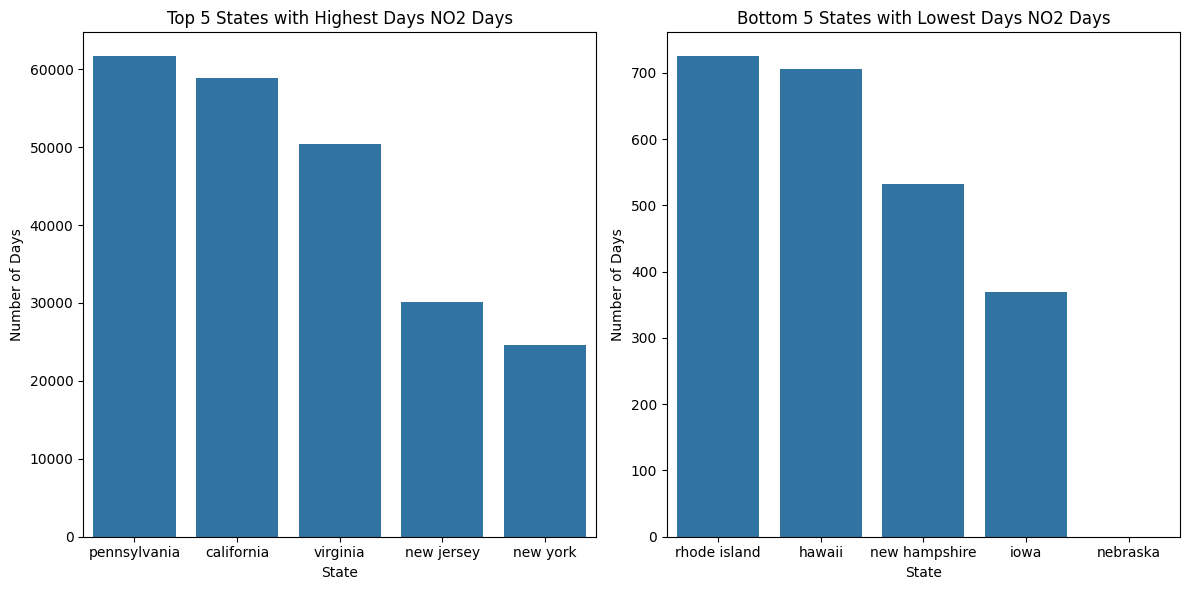

Top 5 states with highest Days Ozone days:
            Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                           
california    10730     58868      371983       90191      24651
new york      12184     24605      224530       46229       7745
florida        4904      5840      223253       66955      16378
texas          3121     13743      215091       88292       9977
ohio          13346     12629      197954       69425      37370
Bottom 5 states with lowest Days Ozone days:
               Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                              
hawaii            1985       706       10674       12684       6394
connecticut       1252      1627        9088        2146        792
new hampshire      458       533        3111           0       1504
delaware            93       830        2108           0         47
rhode island       370       725        1055     

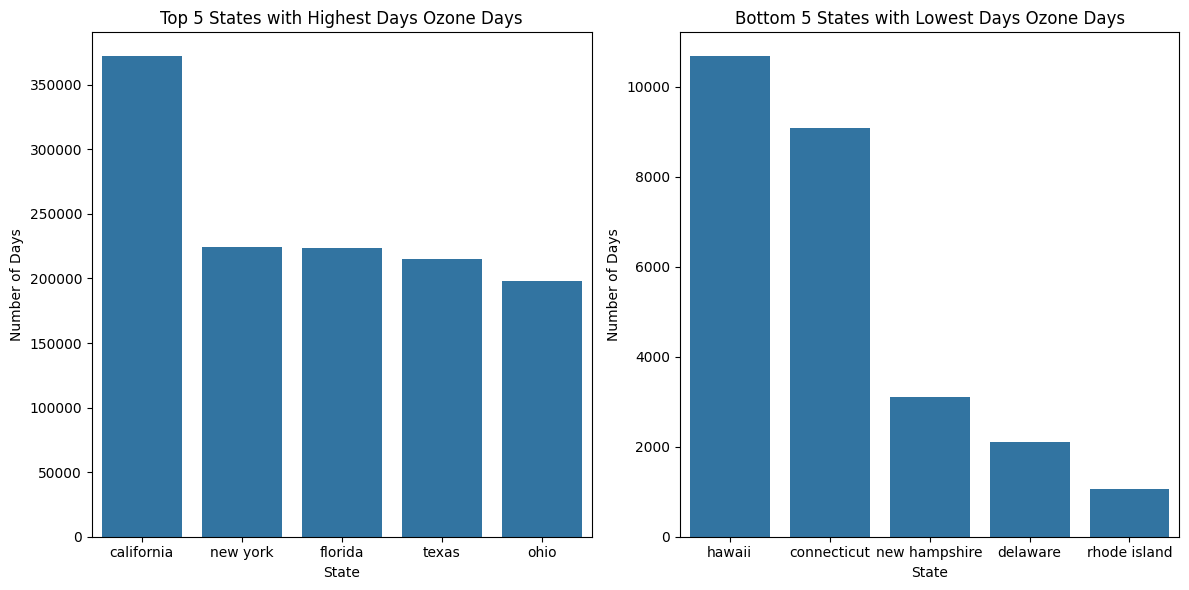

Top 5 states with highest Days PM2.5 days:
                Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                               
washington        24130      1203       40199      134515      18462
oregon            17911       905       26728      105893      13593
north carolina    13983      2811      188823       91442      11075
california        10730     58868      371983       90191      24651
texas              3121     13743      215091       88292       9977
Bottom 5 states with lowest Days PM2.5 days:
               Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                              
nevada            5240      2417       24576        2761      10065
connecticut       1252      1627        9088        2146        792
rhode island       370       725        1055           0         47
delaware            93       830        2108           0         47
new hampshire      45

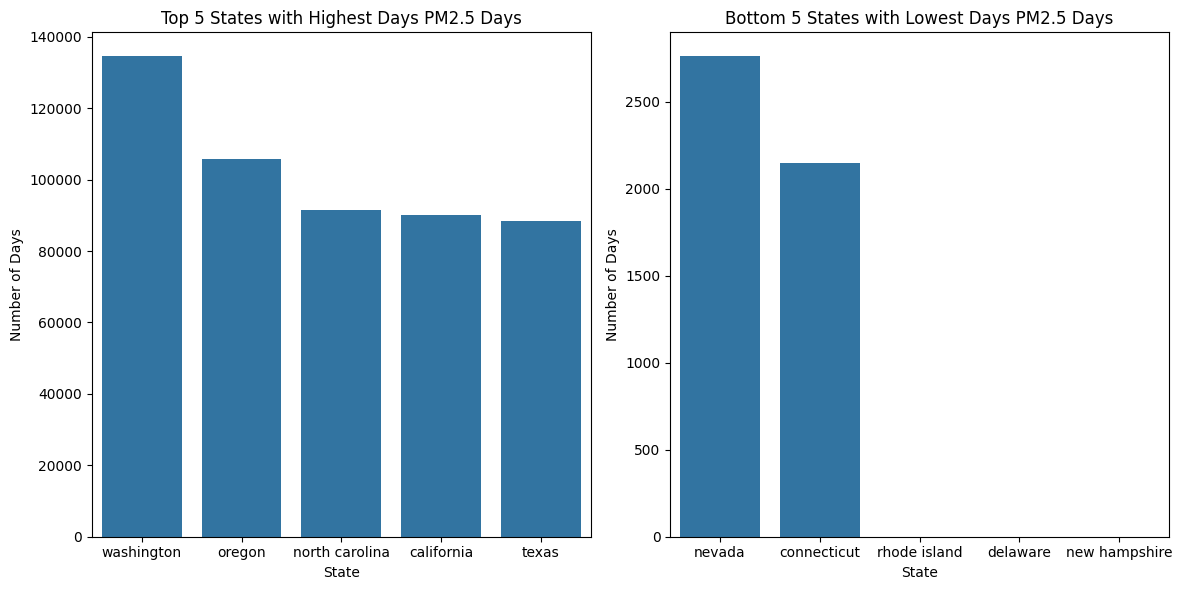

Top 5 states with highest Days PM10 days:
          Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                         
colorado     9246     13941      122554       17226      77238
montana     18342      4323       19316       48793      54233
ohio        13346     12629      197954       69425      37370
wyoming        86      1729       58678        9172      34195
idaho        6139      2535       14247       62394      28629
Bottom 5 states with lowest Days PM10 days:
               Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10
State                                                              
new hampshire      458       533        3111           0       1504
connecticut       1252      1627        9088        2146        792
massachusetts     1008      4415       16472        3812        161
rhode island       370       725        1055           0         47
delaware            93       830        2108           0         

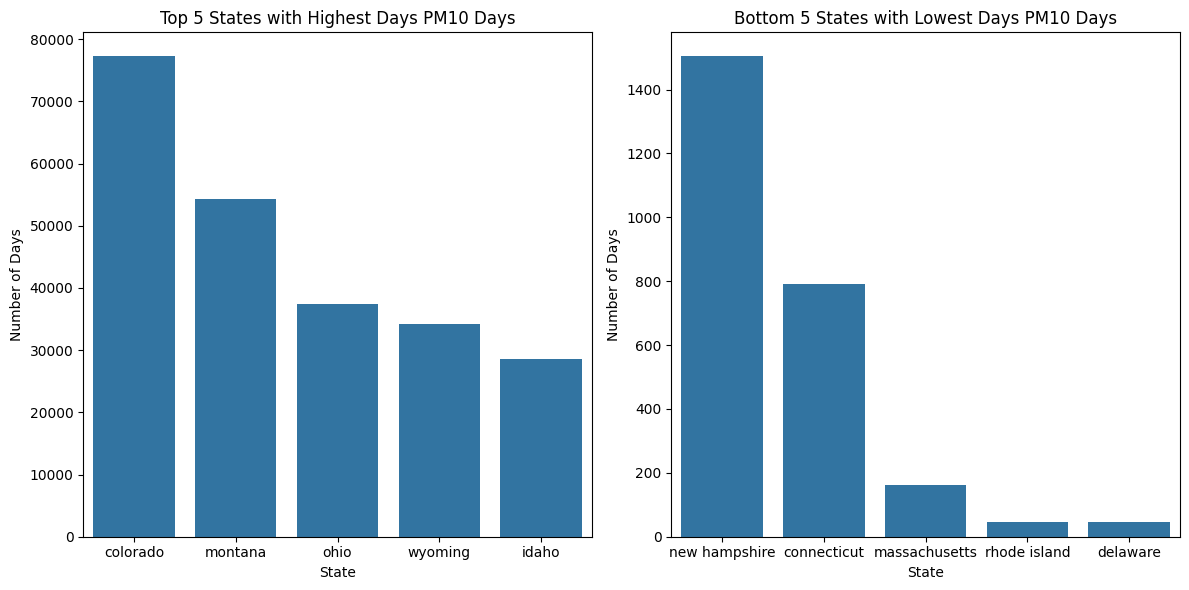

In [5]:
# Aggregate data by state for pollutant days
state_pollutant_days = data.groupby('State')[['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']].sum()

# Define a function to get top and bottom states for a given pollutant
def get_top_bottom_states(pollutant, top_n=5):
    sorted_states = state_pollutant_days.sort_values(by=pollutant, ascending=False)
    top_states = sorted_states.head(top_n)
    bottom_states = sorted_states.tail(top_n)
    return top_states, bottom_states

# Analyze each pollutant
pollutants = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']
for pollutant in pollutants:
    top_states, bottom_states = get_top_bottom_states(pollutant)
    
    # Print results
    print(f"Top 5 states with highest {pollutant} days:")
    print(top_states)
    print(f"Bottom 5 states with lowest {pollutant} days:")
    print(bottom_states)
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=top_states.index, y=top_states[pollutant])
    plt.title(f'Top 5 States with Highest {pollutant} Days')
    plt.ylabel('Number of Days')
    plt.xlabel('State')

    plt.subplot(1, 2, 2)
    sns.barplot(x=bottom_states.index, y=bottom_states[pollutant])
    plt.title(f'Bottom 5 States with Lowest {pollutant} Days')
    plt.ylabel('Number of Days')
    plt.xlabel('State')

    plt.tight_layout()
    plt.show()

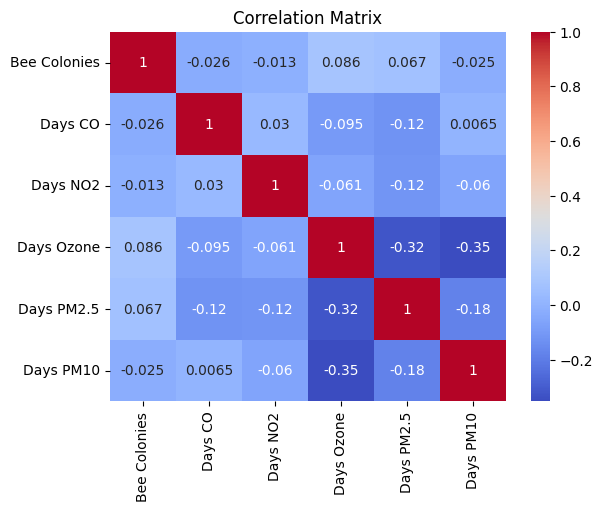

In [32]:
# Correlation matrix
correlation_matrix = data[['Bee Colonies'] + pollutants].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()